# Used Car Analysis 

### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load dataset

df = pd.read_csv("used_cars_data.csv")
df

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN


In [4]:
# Getting information about number of columns and rows, data types, data about nul/not null values and memory usage.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [5]:
# Finding Null Values presence in respective columns.

df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

#### Let's check the Percentage of missing data compared to whole data with respect to all columns.

#### Here Columns New_Price and Price have maximun missing values.


Another way to check seperately as below:

In [6]:
new_price_missing =df['New_Price'].isnull().sum()

total_cells = len(df)

print(f"Total missing values in New Price: {new_price_missing}\n")

# Finding Percent New_Price vs Total Data

Percet_miss_NP = ((new_price_missing)/(total_cells))*100

print(f"Percent of Missing from Whole Data: {Percet_miss_NP}")


Total missing values in New Price: 6247

Percent of Missing from Whole Data: 86.12987729215497


In [7]:
# Checking Unique values in df.

df.nunique()

S.No.                7253
Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               450
Engine                150
Power                 386
Seats                   9
New_Price             625
Price                1373
dtype: int64

#### Let's Remove columns S.NO. and New_Price
As **S.No.** is just another index and **New_Price** has too much missing values.

In [8]:
df = df.drop(['S.No.','New_Price'],axis=1)

In [9]:
# Checking columns in df

df.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')

In [10]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


#### From Column Year we can derive current age of the item i.e. Car

In [11]:
from datetime import date

current_year = date.today().year     #This will return current year

df['Car_Age'] = (current_year - df['Year'])

In [12]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,13
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,8
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,12
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,11
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,10


#### From Column Name we can derive Brand and Model.

In [13]:
df['Brand'] = df.Name.str.split().str.get(0)
df['Brand']

0              Maruti
1             Hyundai
2               Honda
3              Maruti
4                Audi
            ...      
7248       Volkswagen
7249       Volkswagen
7250           Nissan
7251       Volkswagen
7252    Mercedes-Benz
Name: Brand, Length: 7253, dtype: object

In [14]:
df['Model'] = df.Name.str.split().str.get(1) +" "+ df.Name.str.split().str.get(2)
df['Model']

0                 Wagon R
1               Creta 1.6
2                  Jazz V
3              Ertiga VDI
4                  A4 New
              ...        
7248         Vento Diesel
7249              Polo GT
7250         Micra Diesel
7251              Polo GT
7252    E-Class 2009-2013
Name: Model, Length: 7253, dtype: object

In [15]:
# Let's see Original column and Derived columns.
df[['Name','Brand','Model']]

,Name,Brand,Model
0,Maruti Wagon R LXI CNG,Maruti,Wagon R
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Creta 1.6
2,Honda Jazz V,Honda,Jazz V
3,Maruti Ertiga VDI,Maruti,Ertiga VDI
4,Audi A4 New 2.0 TDI Multitronic,Audi,A4 New
...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Volkswagen,Vento Diesel
7249,Volkswagen Polo GT TSI,Volkswagen,Polo GT
7250,Nissan Micra Diesel XV,Nissan,Micra Diesel
7251,Volkswagen Polo GT TSI,Volkswagen,Polo GT


In [16]:
# Finding all Categorical cols with Unique value.

for cols in df.describe(include='object'):
    
    print(cols) 
    print(df[cols].unique())
    print(" ")

Name
['Maruti Wagon R LXI CNG' 'Hyundai Creta 1.6 CRDi SX Option'
 'Honda Jazz V' ... 'Ford EcoSport 1.5 Petrol Ambiente'
 'Jeep Compass 1.4 Sport' 'Hyundai Elite i20 Magna Plus']
 
Location
['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
 
Fuel_Type
['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']
 
Transmission
['Manual' 'Automatic']
 
Owner_Type
['First' 'Second' 'Fourth & Above' 'Third']
 
Mileage
['26.6 km/kg' '19.67 kmpl' '18.2 kmpl' '20.77 kmpl' '15.2 kmpl'
 '21.1 km/kg' '23.08 kmpl' '11.36 kmpl' '20.54 kmpl' '22.3 kmpl'
 '21.56 kmpl' '16.8 kmpl' '25.2 kmpl' '12.7 kmpl' '0.0 kmpl' '13.5 kmpl'
 '25.8 kmpl' '28.4 kmpl' '20.45 kmpl' '14.84 kmpl' '22.69 kmpl'
 '23.65 kmpl' '13.53 kmpl' '18.5 kmpl' '14.4 kmpl' '20.92 kmpl'
 '17.5 kmpl' '12.8 kmpl' '19.01 kmpl' '14.53 kmpl' '11.18 kmpl'
 '12.4 kmpl' '16.09 kmpl' '14.0 kmpl' '24.3 kmpl' '18.15 kmpl'
 '11.74 kmpl' '22.07 kmpl' '19.7 kmpl' '25.4 kmpl' '25.32 kmpl'
 '14.62 kmpl' '

In [17]:
# Finding unique value in Brand
print(df.Brand.unique())


['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'ISUZU' 'Force' 'Bentley'
 'Lamborghini' 'Hindustan' 'OpelCorsa']


In [18]:
# Finding some entries represents same value and some requires proper meaningful name.

searchfor = ['Isuzu' ,'ISUZU','Mini','Land']
df[df.Brand.str.contains('|'.join(searchfor))].head()


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Brand,Model
13,Land Rover Range Rover 2.2L Pure,Delhi,2014,72000,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,27.00,9,Land,Rover Range
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0.0 kmpl,2179 CC,115 bhp,5.0,17.50,11,Land,Rover Freelander
176,Mini Countryman Cooper D,Jaipur,2017,8525,Diesel,Automatic,Second,16.6 kmpl,1998 CC,112 bhp,5.0,23.00,6,Mini,Countryman Cooper
191,Land Rover Range Rover 2.2L Dynamic,Coimbatore,2018,36091,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,55.76,5,Land,Rover Range
228,Mini Cooper Convertible S,Kochi,2017,26327,Petrol,Automatic,First,16.82 kmpl,1998 CC,189.08 bhp,4.0,35.67,6,Mini,Cooper Convertible


In [19]:
df["Brand"].replace({"ISUZU": "Isuzu", "Mini": "Mini Cooper","Land":"Land Rover"}, inplace=True)
print(df.Brand.unique())

['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land Rover' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra'
 'Ford' 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda'
 'Mini Cooper' 'Fiat' 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'Force'
 'Bentley' 'Lamborghini' 'Hindustan' 'OpelCorsa']


In [20]:
# Using Transpose

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.0,2014.00,2016.00,2019.0
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.0,53416.00,73000.00,6500000.0
Seats,7200.0,5.279722,0.811660,0.00,5.0,5.00,5.00,10.0
Price,6019.0,9.479468,11.187917,0.44,3.5,5.64,9.95,160.0
Car_Age,7253.0,9.634634,3.254421,4.00,7.0,9.00,12.00,27.0


In [21]:
# To get all data types with describe()

df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.0,NaN,NaN,NaN,2013.365366,3.254421,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7253.0,NaN,NaN,NaN,58699.063146,84427.720583,171.0,34000.0,53416.0,73000.0,6500000.0
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251,450,17.0 kmpl,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,7207,150,1197 CC,732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Power,7207,386,74 bhp,280,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# to check number of entries 

df.shape

(7253, 15)

#### We can drop column Name as we have derived and Meaningful columns from it.

In [23]:
df =df.drop(['Name'],axis=1)

#### Also, we can drop Year as we derived Featured called Brand and Model.

In [24]:
df =df.drop(['Year'],axis=1)
df

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Brand,Model
0,Mumbai,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,13,Maruti,Wagon R
1,Pune,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,8,Hyundai,Creta 1.6
2,Chennai,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,12,Honda,Jazz V
3,Chennai,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,11,Maruti,Ertiga VDI
4,Coimbatore,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,10,Audi,A4 New
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Hyderabad,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,12,Volkswagen,Vento Diesel
7249,Mumbai,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,8,Volkswagen,Polo GT
7250,Kolkata,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,11,Nissan,Micra Diesel
7251,Pune,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,10,Volkswagen,Polo GT


#### Now, let's take columns which can be numerical but is in categorical.

In [25]:
df['Mileage'].head(10)

0    26.6 km/kg
1    19.67 kmpl
2     18.2 kmpl
3    20.77 kmpl
4     15.2 kmpl
5    21.1 km/kg
6    23.08 kmpl
7    11.36 kmpl
8    20.54 kmpl
9     22.3 kmpl
Name: Mileage, dtype: object

In [26]:
df['Mileage']=df.Mileage.str.split().str.get(0)
df['Mileage']

0        26.6
1       19.67
2        18.2
3       20.77
4        15.2
        ...  
7248    20.54
7249    17.21
7250    23.08
7251     17.2
7252     10.0
Name: Mileage, Length: 7253, dtype: object

#### Now, Need to convert data type from Object to float

In [27]:
df['Mileage']= df['Mileage'].astype(float)

In [28]:
df.Mileage.dtype

dtype('float64')

#### Working with column Engine

In [29]:
df['Engine']= df.Engine.str.split().str.get(0)
df['Engine'] = df['Engine'].astype(float)

In [30]:
df.Engine.dtype

dtype('float64')

#### Working with column Power

In [31]:
df['Power']= df.Power.str.split().str.get(0)

In [32]:
df.isnull().sum()

Location                0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
Price                1234
Car_Age                 0
Brand                   0
Model                   1
dtype: int64

#### Before, we perform type conversion we must fix missing values as it will give error later.

In [33]:
df['Power']=df['Power'].fillna(0)

In [34]:
df.Power.isnull().sum()

0

In [35]:
df.Power.unique()

array(['58.16', '126.2', '88.7', '88.76', '140.8', '55.2', '63.1',
       '171.5', '103.6', '74', '103.25', '116.3', '187.7', '115',
       '175.56', '98.6', '83.8', '167.62', '190', '88.5', '177.01', '80',
       '67.1', '102', '108.45', '138.1', '184', '179.5', '103.5', '64',
       '82', '254.8', '73.9', '46.3', '37.5', '77', '82.9', '149.92',
       '138.03', '112.2', '163.7', '71', '105', '174.33', '75', '103.2',
       '53.3', '78.9', '147.6', '147.8', '68', '186', '170', '69', '140',
       '78', '194', '500', '108.5', '86.8', '187.74', 'null', '132',
       '86.7', '73.94', '117.3', '218', '168.5', '89.84', '110', '90',
       '82.85', '67', '241.4', '35', '270.9', '126.32', '73', '130',
       '100.6', '150', '75.94', '215', '107.3', '37.48', '120', '178',
       '152', '91.1', '85.80', '362.07', '121.3', '143', '81.80', '171',
       '76.8', '103.52', '444', '362.9', '67.06', '120.7', '258', '81.86',
       '112', '88.73', '57.6', '157.75', '102.5', '201.1', '83.1',
       '6

In [36]:
df['Power']=df.Power.str.replace("null","0")

In [37]:
df['Power'] = df['Power'].astype(float)

In [38]:
df.Power.dtype

dtype('float64')

#### Missing values

In [39]:
df.isnull().sum()

Location                0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
Price                1234
Car_Age                 0
Brand                   0
Model                   1
dtype: int64

In [40]:
df['Mileage']=df['Mileage'].fillna(0)

In [41]:
df['Engine']=df['Engine'].fillna(df.Engine.mean())

In [42]:
df['Power']=df['Power'].fillna(df.Power.mean())

In [43]:
df['Seats']=df['Seats'].fillna(df.Seats.mode()[0])

In [44]:
df['Price']=df['Price'].fillna(df.Price.median())

In [45]:
df.Price.median()

5.64

In [46]:
df.Price.mode()

0    5.64
Name: Price, dtype: float64

In [47]:
df.Price.mean()

8.826234661519258

In [48]:
df = df.dropna()

In [49]:
df.isnull().sum()

Location             0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Car_Age              0
Brand                0
Model                0
dtype: int64

#### No missing values now and Data is clean 

In [50]:
# Checking Unique Locations

df.Location.unique()

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

In [51]:
df.shape

(7252, 13)

In [52]:
# Let's Confirm Datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7252 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           7252 non-null   object 
 1   Kilometers_Driven  7252 non-null   int64  
 2   Fuel_Type          7252 non-null   object 
 3   Transmission       7252 non-null   object 
 4   Owner_Type         7252 non-null   object 
 5   Mileage            7252 non-null   float64
 6   Engine             7252 non-null   float64
 7   Power              7252 non-null   float64
 8   Seats              7252 non-null   float64
 9   Price              7252 non-null   float64
 10  Car_Age            7252 non-null   int64  
 11  Brand              7252 non-null   object 
 12  Model              7252 non-null   object 
dtypes: float64(5), int64(2), object(6)
memory usage: 793.2+ KB


In [53]:
# Let's find basic stats
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Kilometers_Driven,7252.0,58700.262686,84433.480370,171.00,34000.00,53429.00,73000.00,6500000.00
Mileage,7252.0,18.137121,4.571584,0.00,15.17,18.16,21.10,33.54
Engine,7252.0,1616.604851,593.429061,72.00,1198.00,1493.00,1968.00,5998.00
Power,7252.0,110.749936,54.908992,0.00,74.00,93.70,138.03,616.00
Seats,7252.0,5.277716,0.809088,0.00,5.00,5.00,5.00,10.00
Price,7252.0,8.826674,10.293955,0.44,3.85,5.64,8.40,160.00
Car_Age,7252.0,9.633480,3.253162,4.00,7.00,9.00,12.00,27.00


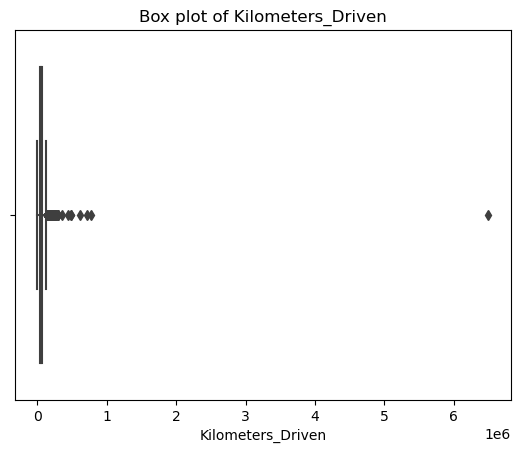

In [54]:
plt.title("Box plot of Kilometers_Driven")
sns.boxplot(x=df.Kilometers_Driven)
plt.show()

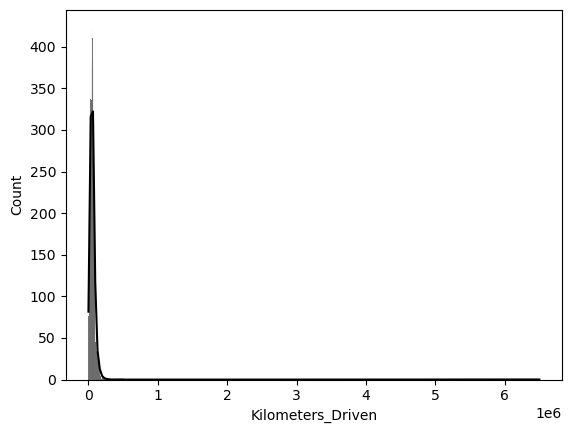

In [55]:
sns.histplot(x=df.Kilometers_Driven,kde=True,color='k')
plt.show()

#### Outliers found in Kilometers_Driven. We must handle it.

In [56]:
# Using IQR method

Q1 = df['Kilometers_Driven'].quantile(0.25)
Q3 = df['Kilometers_Driven'].quantile(0.75)
print(Q1)
print(Q3)

34000.0
73000.0


In [57]:
IQR =Q3-Q1
IQR

39000.0

In [58]:
low_lim = Q1 - 1.5*IQR
up_lim = Q3 + 1.5*IQR
print(low_lim)
print(up_lim)

-24500.0
131500.0


In [59]:
outlier_low = (df['Kilometers_Driven'] < low_lim)
outlier_up = (df['Kilometers_Driven'] > up_lim)

In [60]:
len(df['Kilometers_Driven']) -len(df['Kilometers_Driven'][outlier_low] + df['Kilometers_Driven'][outlier_up])

6994

In [61]:
df['Kilometers_Driven'][outlier_low|outlier_up]

29      262000
64      178000
77      230000
154     136997
164     147898
         ...  
7183    137711
7198    147202
7200    190000
7213    170000
7227    160000
Name: Kilometers_Driven, Length: 258, dtype: int64

In [62]:
df['Kilometers_Driven'][~(outlier_low|outlier_up)]

0       72000
1       41000
2       46000
3       87000
4       40670
        ...  
7248    89411
7249    59000
7250    28000
7251    52262
7252    72443
Name: Kilometers_Driven, Length: 6994, dtype: int64

In [63]:
df.shape

(7252, 13)

In [64]:
df = df[~(outlier_low|outlier_up)]

In [65]:
df.shape

(6994, 13)

In [66]:
df.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Brand,Model
0,Mumbai,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,13,Maruti,Wagon R
1,Pune,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,8,Hyundai,Creta 1.6
2,Chennai,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,12,Honda,Jazz V
3,Chennai,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,11,Maruti,Ertiga VDI
4,Coimbatore,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,10,Audi,A4 New


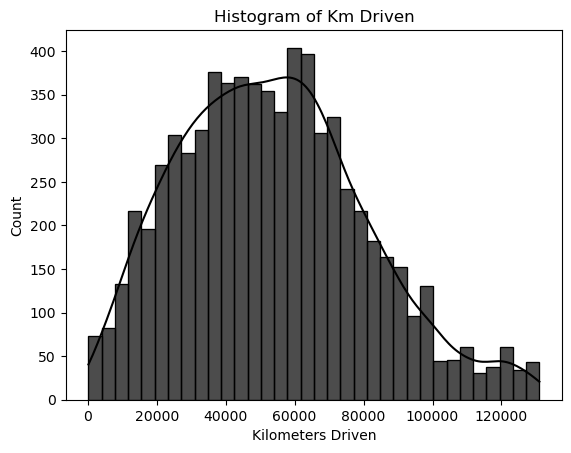

In [67]:
plt.title("Histogram of Km Driven")
sns.histplot(x=df.Kilometers_Driven,kde=True,color='k',alpha=0.7)
plt.xlabel("Kilometers Driven")
plt.show()

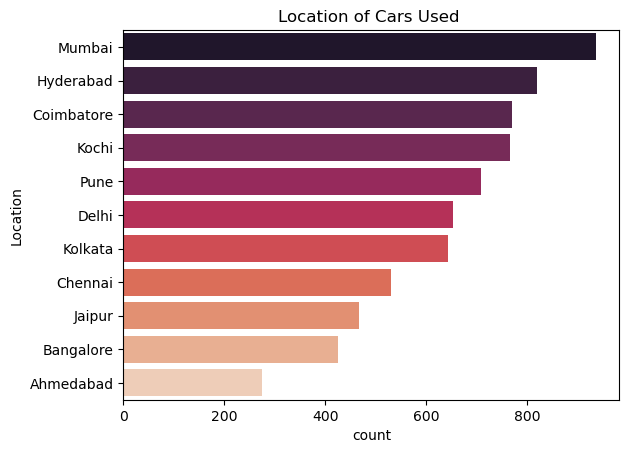

In [68]:
plt.title("Location of Cars Used ")
ax = sns.countplot(y=df.Location,palette='rocket',order=df.Location.value_counts().index)
plt.show()

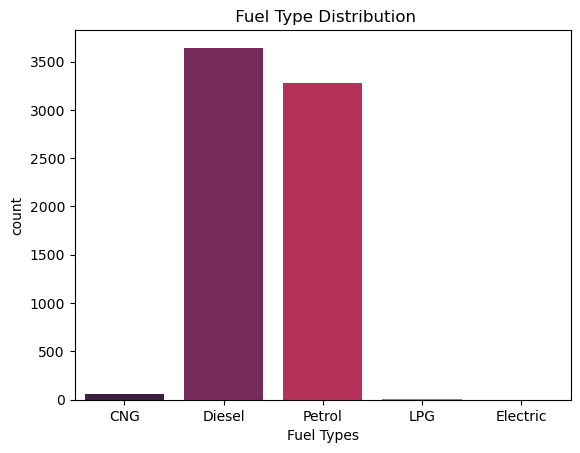

In [69]:
plt.title(" Fuel Type Distribution")
sns.countplot(x=df.Fuel_Type,palette='rocket')
plt.xlabel("Fuel Types")
plt.show()

#### Fuel Types shows that Diesel( ~3500*) and Petrol( ~3000*) are highly in use with count of above 3000 Cars

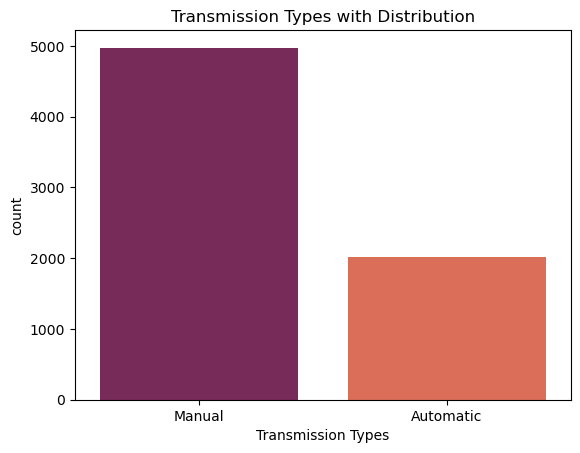

In [70]:
plt.title("Transmission Types with Distribution")
sns.countplot(x=df.Transmission,palette='rocket')
plt.xlabel("Transmission Types")
plt.show()

####  Owner tends to use car with Manual(~5000), which is more than Double of Automatic cars.

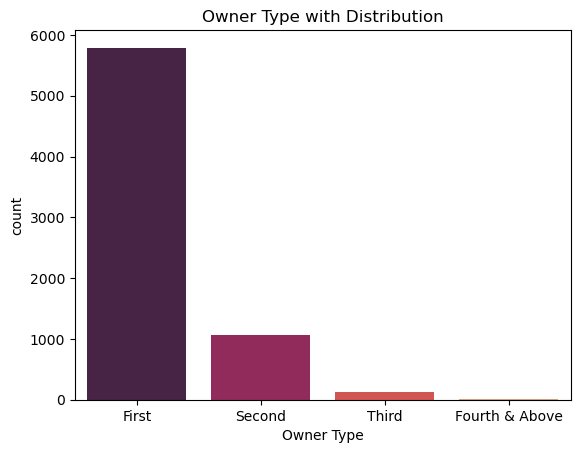

In [71]:
plt.title("Owner Type with Distribution")
sns.countplot(x=df.Owner_Type,palette='rocket')
plt.xlabel("Owner Type")
plt.show()

#### Owners of First hand cars (~6000) are in large numbers leaving other types far away.

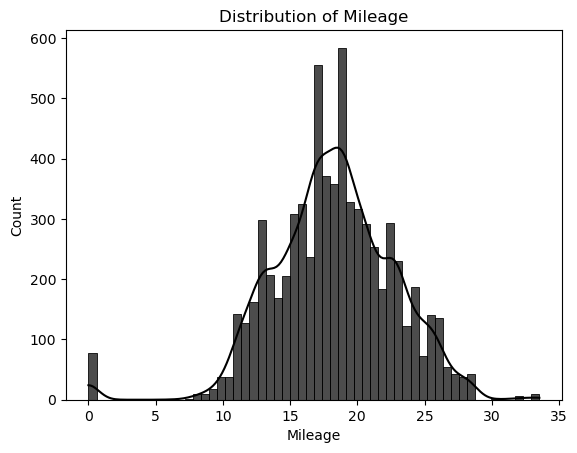

In [72]:
plt.title("Distribution of Mileage")
sns.histplot(x=df.Mileage,kde=True,color='k',alpha=0.7)
plt.xlabel("Mileage")
plt.show()

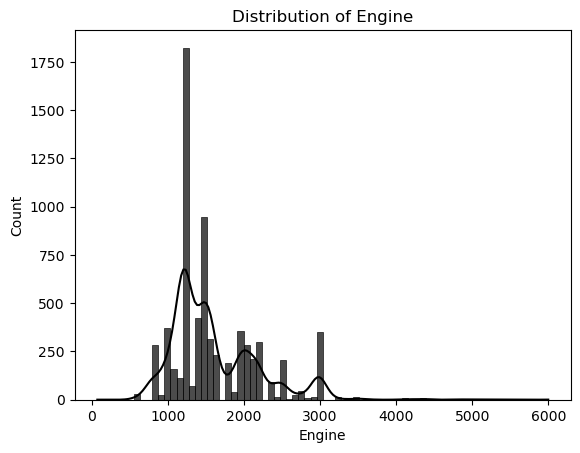

In [73]:
plt.title("Distribution of Engine")
sns.histplot(x=df.Engine,kde=True,color='k',alpha=0.7)
plt.xlabel("Engine")
plt.show()

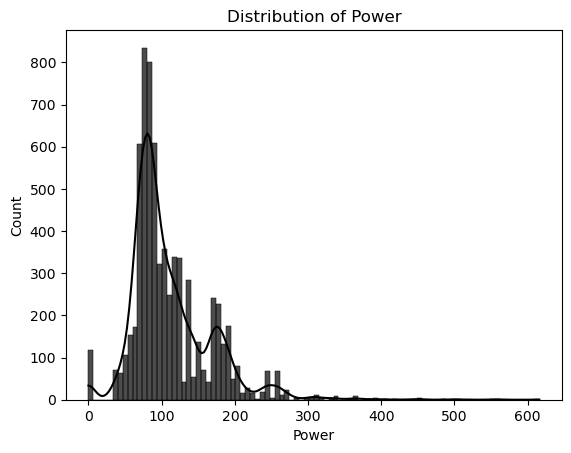

In [74]:
plt.title("Distribution of Power")
sns.histplot(x=df.Power,kde=True,color='k',alpha=0.7)
plt.xlabel("Power")
plt.show()

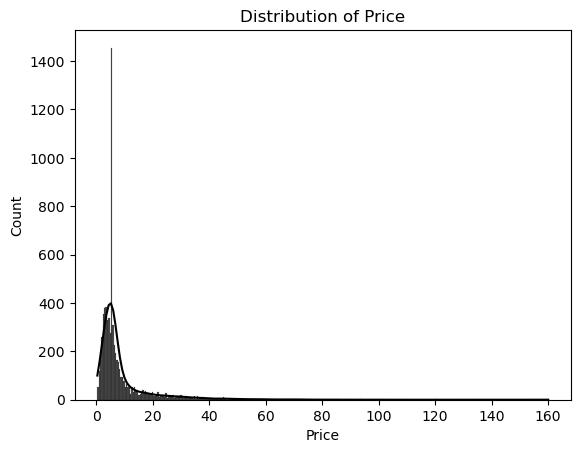

In [75]:
plt.title("Distribution of Price")
sns.histplot(x=df.Price,kde=True,color='k',alpha=0.7)
plt.xlabel("Price")
plt.show()

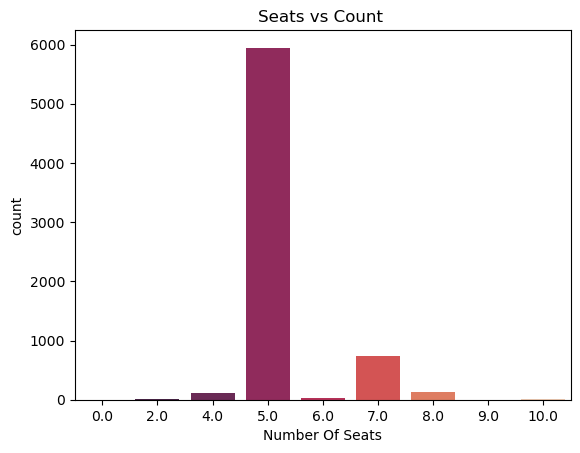

In [76]:
plt.title("Seats vs Count ")
sns.countplot(x=df.Seats,palette='rocket')
plt.xlabel("Number Of Seats")
plt.show()

#### 5 Seater Cars are Highest in Use. 

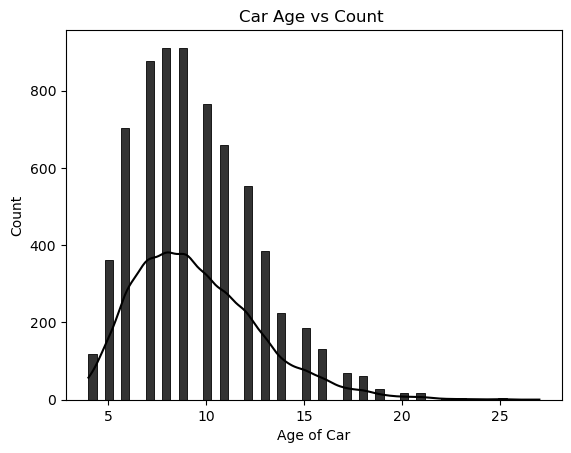

In [77]:
plt.title("Car Age vs Count ")
sns.histplot(x=df.Car_Age,color='k',kde='True',alpha=0.8)
plt.xlabel("Age of Car")
plt.show()

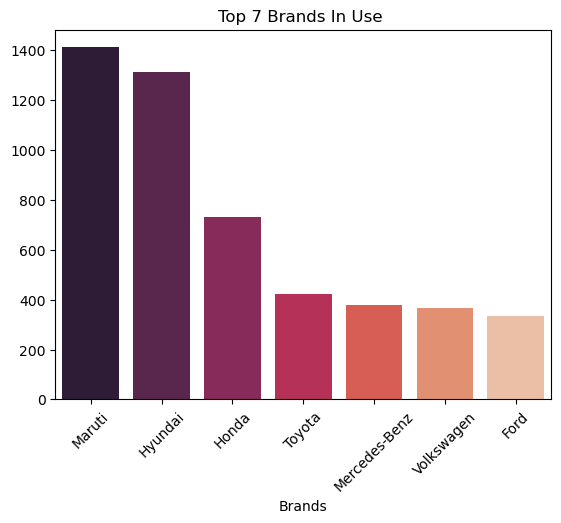

In [78]:
plt.title("Top 7 Brands In Use ")
ax = sns.barplot(x=df.Brand.value_counts().index[:7],y=df.Brand.value_counts().values[:7]  ,palette='rocket')
plt.xlabel("Brands")
ax.set_xticklabels(ax.get_xticklabels(),rotation =45)
plt.show()

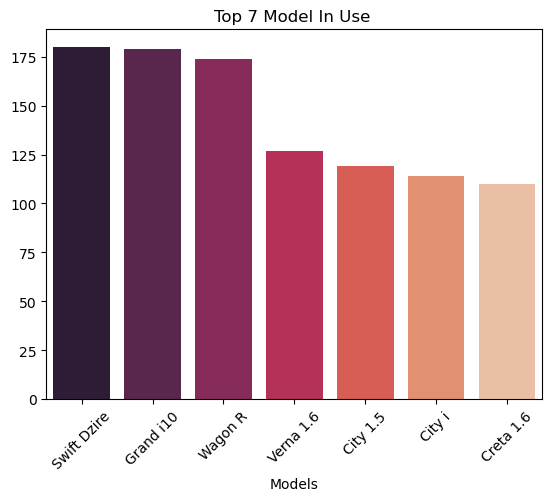

In [79]:
plt.title("Top 7 Model In Use ")
ax = sns.barplot(x=df.Model.value_counts().index[:7],y=df.Model.value_counts().values[:7]  ,palette='rocket')
plt.xlabel("Models")
ax.set_xticklabels(ax.get_xticklabels(),rotation =45)
plt.show()

### DATA VISUALIZATION 

In [80]:
df.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Brand,Model
0,Mumbai,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,13,Maruti,Wagon R
1,Pune,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,8,Hyundai,Creta 1.6
2,Chennai,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,12,Honda,Jazz V
3,Chennai,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,11,Maruti,Ertiga VDI
4,Coimbatore,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,10,Audi,A4 New


### Insights for column Location 

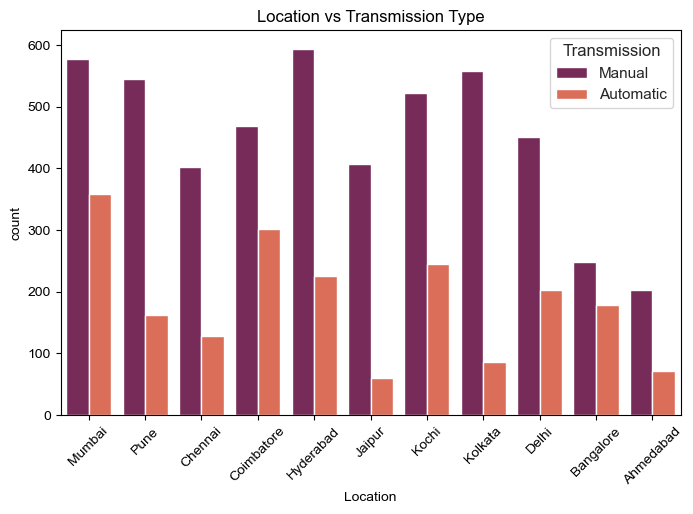

In [81]:
plt.figure(figsize=(8,5))
plt.title(label="Location vs Transmission Type")
sns.set(style='whitegrid')
ax1 =sns.countplot(x="Location",hue='Transmission',data=df,palette='rocket')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
plt.show(ax1)

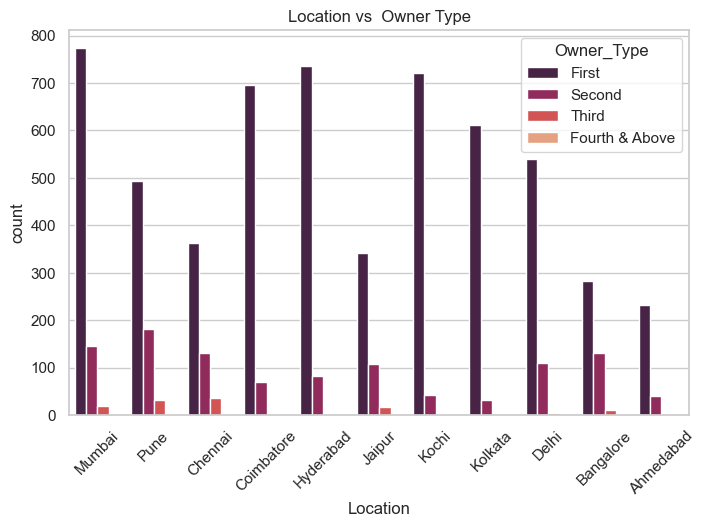

In [82]:
plt.figure(figsize=(8,5))
plt.title(label="Location vs  Owner Type")
sns.set(style='whitegrid')
ax1 =sns.countplot(x="Location",hue='Owner_Type',data=df,palette='rocket')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
plt.show(ax1)

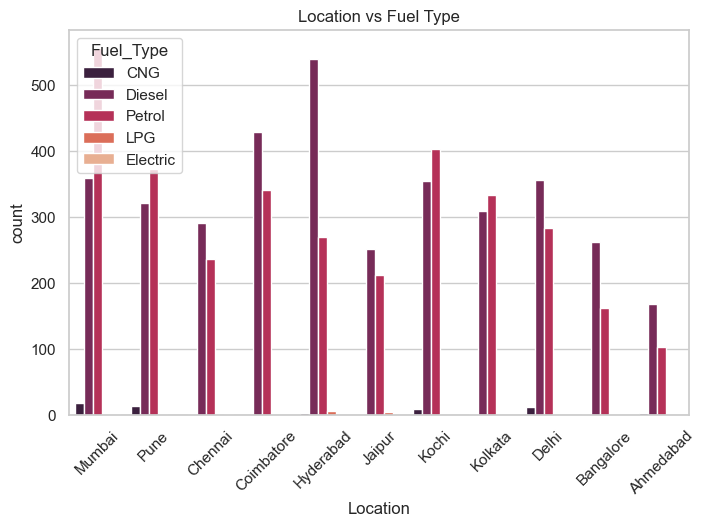

In [83]:
plt.figure(figsize=(8,5))
plt.title(label="Location vs Fuel Type")
sns.set(style='whitegrid')
ax1 =sns.countplot(x="Location",hue='Fuel_Type',data=df,palette='rocket')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
plt.show(ax1)

### KM driven vs Price

In [84]:
df['km/1000'] = df['Kilometers_Driven']/1000

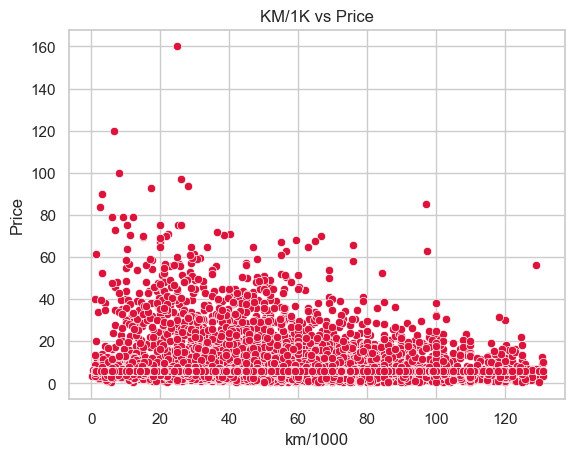

In [85]:
plt.title("KM/1K vs Price")
sns.set(style='whitegrid')
sns.scatterplot(x=df['km/1000'],y=df.Price,data=df,color='crimson')
plt.show()

#### Outliers handling in Price Column

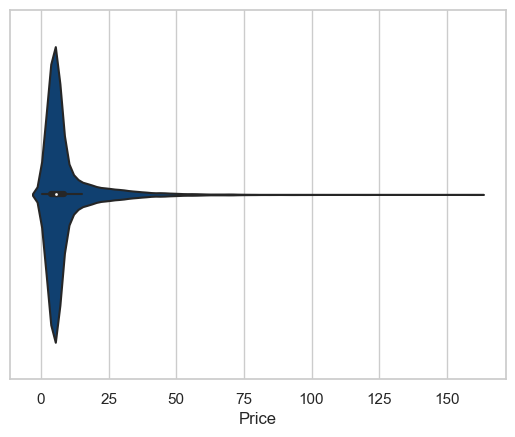

In [86]:
sns.set(style='whitegrid')
sns.violinplot(x=df.Price,palette='ocean')
plt.show()

In [87]:
# Using IQR method

Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
print(Q1)
print(Q3)

3.89
8.5


In [88]:
IQR = Q3 - Q1
IQR

4.609999999999999

In [89]:
low_lim = Q1 - 1.5*IQR
up_lim = Q3 + 1.5*IQR
print(low_lim)
print(up_lim)

-3.024999999999999
15.415


In [90]:
outlier_low = (df['Price'] < low_lim)
outlier_up = (df['Price'] > up_lim)

In [91]:
len(df['Price']) -len(df['Price'][outlier_low] + df['Price'][outlier_up])

6023

In [92]:
df['Price'][outlier_low|outlier_up]

4       17.74
7       17.50
13      27.00
14      17.50
19      28.00
        ...  
5989    16.52
5996    30.54
6001    17.56
6008    45.00
6009    19.75
Name: Price, Length: 971, dtype: float64

In [93]:
df['Price'][~(outlier_low|outlier_up)]

0        1.75
1       12.50
2        4.50
3        6.00
5        2.35
        ...  
7248     5.64
7249     5.64
7250     5.64
7251     5.64
7252     5.64
Name: Price, Length: 6023, dtype: float64

In [94]:
df.shape

(6994, 14)

In [95]:
df_1 = df[~(outlier_low|outlier_up)]

In [96]:
df_1.shape

(6023, 14)

In [97]:
removed_rows = (df.shape[0])-(df_1.shape[0])
removed_rows


971

## df_1 is created by dropping 806 rows from df dataframe where we removed outliers from Price column.

In [98]:
df_1.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Brand,Model,km/1000
0,Mumbai,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,13,Maruti,Wagon R,72.0
1,Pune,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,8,Hyundai,Creta 1.6,41.0
2,Chennai,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,12,Honda,Jazz V,46.0
3,Chennai,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,11,Maruti,Ertiga VDI,87.0
5,Hyderabad,75000,LPG,Manual,First,21.10,814.0,55.20,5.0,2.35,11,Hyundai,EON LPG,75.0


### Insights of Price column with all respective columns

In [99]:
loc_vs_price = df_1.groupby('Location')['Price'].mean().sort_values(ascending=True).reset_index()
loc_vs_price

,Location,Price
0,Kolkata,4.593958
1,Jaipur,4.735831
2,Pune,4.918600
3,Chennai,4.922679
4,Hyderabad,5.550922
5,Delhi,5.708839
6,Ahmedabad,5.749627
7,Mumbai,5.788578
8,Bangalore,5.815062
9,Kochi,6.292884


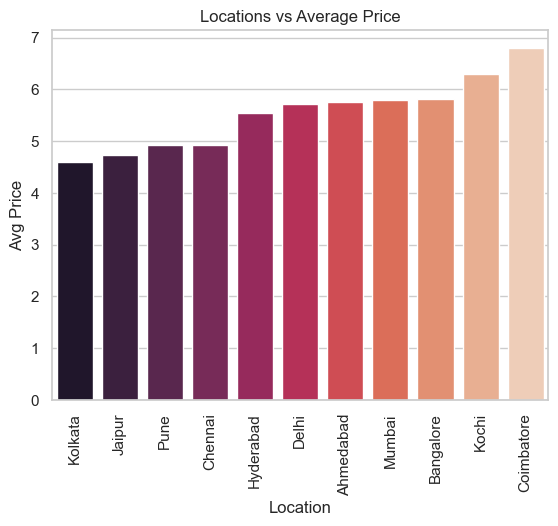

In [100]:
ax = sns.barplot(x=loc_vs_price.Location,y=loc_vs_price.Price,palette='rocket')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title("Locations vs Average Price")
plt.xlabel("Location")
plt.ylabel("Avg Price")
plt.show()

In [101]:
km_vs_price = df_1.groupby('km/1000')['Price'].mean().reset_index()
km_vs_price

,km/1000,Price
0,0.171,3.600000
1,0.600,6.250000
2,1.000,6.297000
3,1.001,6.515000
4,1.011,13.500000
...,...,...
3067,130.000,4.338824
3068,130.002,3.850000
3069,130.790,9.240000
3070,130.923,12.500000


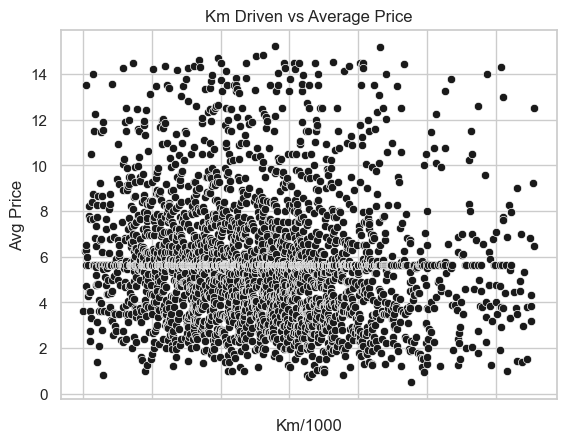

In [102]:
ax = sns.scatterplot(x=km_vs_price['km/1000'],y=km_vs_price.Price,color='k')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title("Km Driven vs Average Price")
plt.xlabel("Km/1000")
plt.ylabel("Avg Price")
plt.show()

In [103]:
fuel_vs_price = df_1.groupby('Fuel_Type')['Price'].mean().sort_values(ascending=True).reset_index()
fuel_vs_price

,Fuel_Type,Price
0,LPG,3.012500
1,CNG,3.722258
2,Petrol,4.771853
3,Diesel,6.469594
4,Electric,12.875000


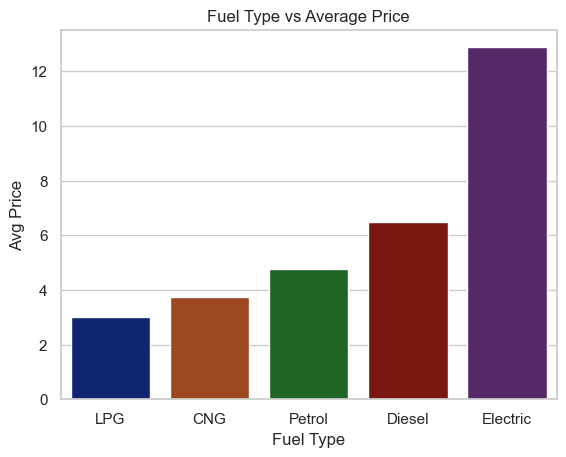

In [104]:
ax = sns.barplot(x=fuel_vs_price['Fuel_Type'],y=fuel_vs_price.Price,palette='dark')
plt.title("Fuel Type vs Average Price")
plt.xlabel("Fuel Type")
plt.ylabel("Avg Price")
plt.show()

In [105]:
trans_vs_price = df_1.groupby('Transmission')['Price'].mean().sort_values(ascending=True).reset_index()
trans_vs_price

,Transmission,Price
0,Manual,5.115259
1,Automatic,7.381629


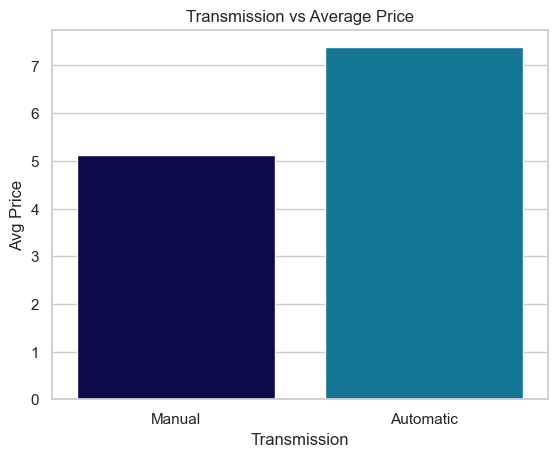

In [106]:
ax = sns.barplot(x=trans_vs_price['Transmission'],y=trans_vs_price.Price,palette='ocean')
plt.title("Transmission vs Average Price")
plt.xlabel("Transmission")
plt.ylabel("Avg Price")
plt.show()

In [107]:
owner_vs_price = df_1.groupby('Owner_Type')['Price'].mean().sort_values(ascending=True).reset_index()
owner_vs_price

,Owner_Type,Price
0,Third,3.642353
1,Fourth & Above,3.904444
2,Second,4.797214
3,First,5.736265


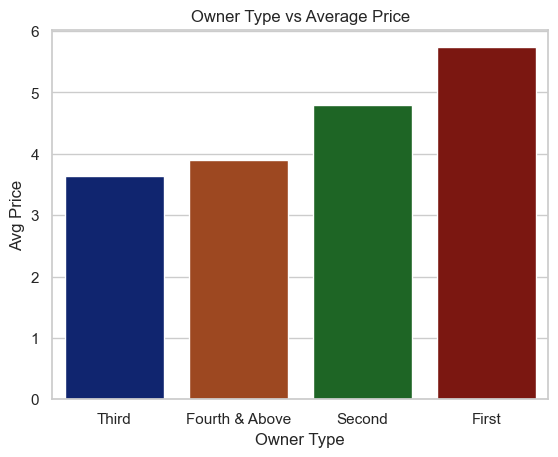

In [108]:
ax = sns.barplot(x=owner_vs_price['Owner_Type'],y=owner_vs_price.Price,palette='dark')
plt.title("Owner Type vs Average Price")
plt.xlabel("Owner Type")
plt.ylabel("Avg Price")
plt.show()

#### Working with Mileage column

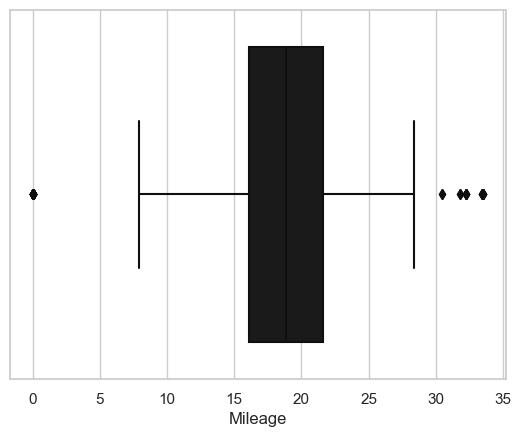

In [109]:
sns.boxplot(x=df_1.Mileage,data=df_1,color='k')
plt.show()

In [110]:
df_1[df_1['Mileage'] <1]

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Brand,Model,km/1000
79,Hyderabad,87591,Petrol,Manual,First,0.0,1086.00000,0.0000,5.0,1.30,18,Hyundai,Santro Xing,87.591
194,Ahmedabad,60006,Petrol,Manual,First,0.0,1616.57347,110.7468,5.0,2.95,16,Honda,City 1.5,60.006
229,Bangalore,70436,Diesel,Manual,First,0.0,1498.00000,99.0000,5.0,3.60,8,Ford,Figo Diesel,70.436
262,Hyderabad,99000,Petrol,Manual,First,0.0,1086.00000,0.0000,5.0,1.75,17,Hyundai,Santro Xing,99.000
307,Chennai,58000,Petrol,Manual,Second,0.0,1086.00000,0.0000,5.0,1.50,17,Hyundai,Santro Xing,58.000
424,Hyderabad,42021,Diesel,Manual,First,0.0,1968.00000,0.0000,5.0,5.45,13,Volkswagen,Jetta 2007-2011,42.021
443,Coimbatore,50243,Petrol,Manual,First,0.0,1086.00000,0.0000,5.0,3.35,11,Hyundai,Santro GLS,50.243
631,Chennai,70000,Petrol,Manual,Third,0.0,1086.00000,0.0000,5.0,0.65,21,Hyundai,Santro LS,70.000
915,Pune,103000,Diesel,Automatic,Second,0.0,799.00000,0.0000,2.0,3.00,15,Smart,Fortwo CDI,103.000
996,Pune,93000,Petrol,Manual,First,0.0,1086.00000,62.0000,5.0,1.45,15,Hyundai,Santro Xing,93.000


#### It is observed, after comparing other features ,0 Mileage here is not possible. So, we will replace with mean of Mileage.

In [111]:
mileage_avg = df_1.Mileage.mean()
df_1['Mileage'] = df_1['Mileage'].replace(0.00,18.77)


In [112]:
df_1 = df_1[df_1['Mileage']<=33]

<AxesSubplot:xlabel='Mileage'>

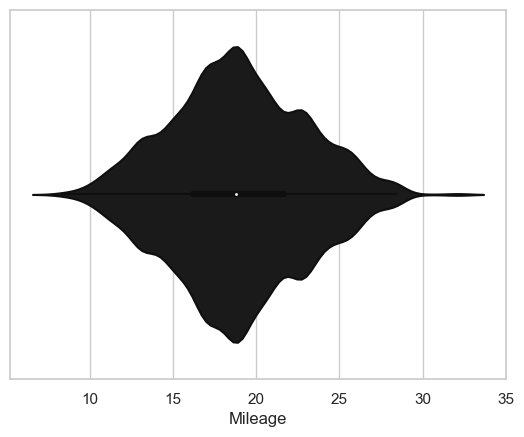

In [113]:
sns.violinplot(x=df_1.Mileage,data=df_1,color='k')

In [114]:
Mileage_vs_price = df_1.groupby('Mileage')['Price'].mean().reset_index()
Mileage_vs_price

,Mileage,Price
0,7.94,5.640000
1,8.30,11.990000
2,8.45,8.195000
3,8.50,14.500000
4,8.70,10.222500
...,...,...
386,28.09,7.507500
387,28.40,6.169767
388,30.46,3.895000
389,31.79,4.190000


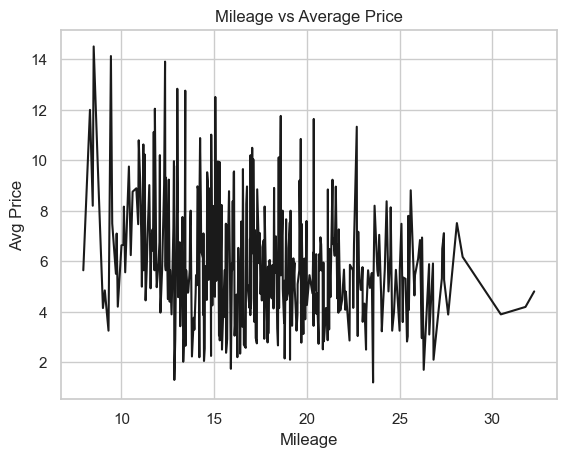

In [115]:
ax = sns.lineplot(x=Mileage_vs_price['Mileage'],y=Mileage_vs_price.Price,color='k')
plt.title("Mileage vs Average Price")
plt.xlabel("Mileage")
plt.ylabel("Avg Price")
plt.show()

#### Working with Engine Column

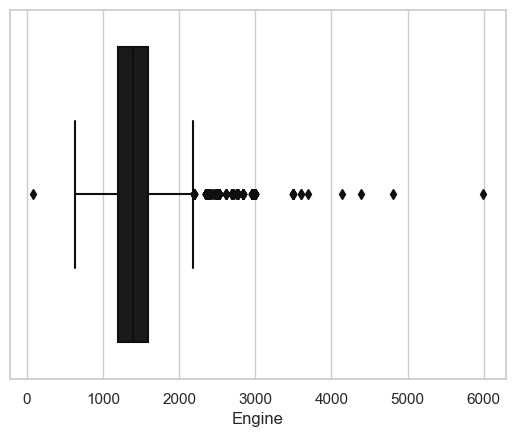

In [116]:
sns.boxplot(x=df_1.Engine,data=df_1,color='k')
plt.show()

#### Removed Extreme Outliers from Engine

In [117]:
df_1 = df_1[(df_1['Engine'] >= 400) & (df_1['Engine'] <= 3000)]

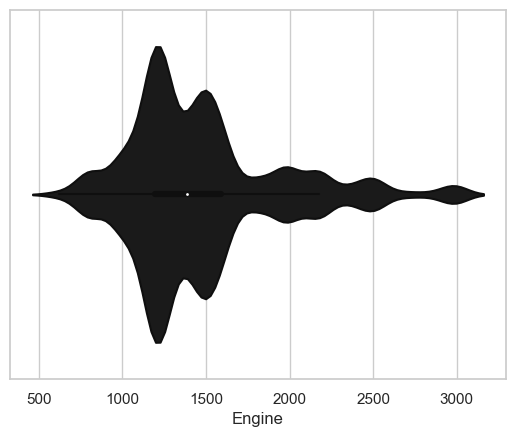

In [118]:
sns.violinplot(x=df_1.Engine,data=df_1,color='k')
plt.show()

In [119]:
df_1[df_1['Engine'] >=3000]

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Brand,Model,km/1000


In [120]:
Engine_vs_price = df_1.groupby('Engine')['Price'].mean().reset_index()
Engine_vs_price

,Engine,Price
0,624.0,2.614516
1,793.0,3.888000
2,796.0,2.915949
3,799.0,3.527750
4,814.0,3.572703
...,...,...
124,2993.0,6.324444
125,2995.0,2.020000
126,2996.0,9.503333
127,2997.0,4.825000


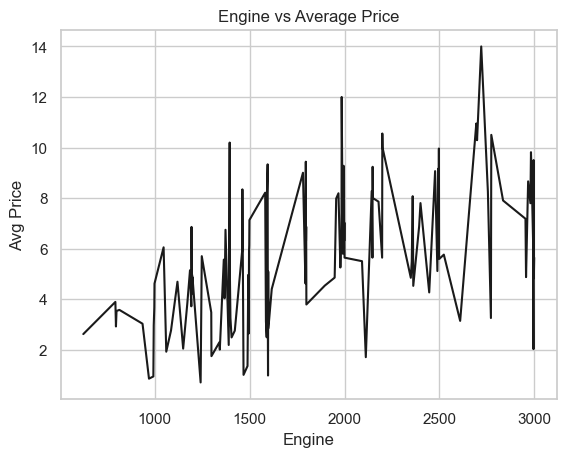

In [121]:
ax = sns.lineplot(x=Engine_vs_price['Engine'],y=Engine_vs_price.Price,color='k')
plt.title("Engine vs Average Price")
plt.xlabel("Engine")
plt.ylabel("Avg Price")
plt.show()

In [122]:
Power_vs_price = df_1.groupby('Power')['Price'].mean().reset_index()
Power_vs_price

,Power,Price
0,0.00,3.273478
1,34.20,2.883750
2,35.00,2.366842
3,35.50,1.350000
4,37.00,1.800714
...,...,...
317,313.00,5.640000
318,321.00,8.195000
319,340.00,2.020000
320,360.00,5.640000


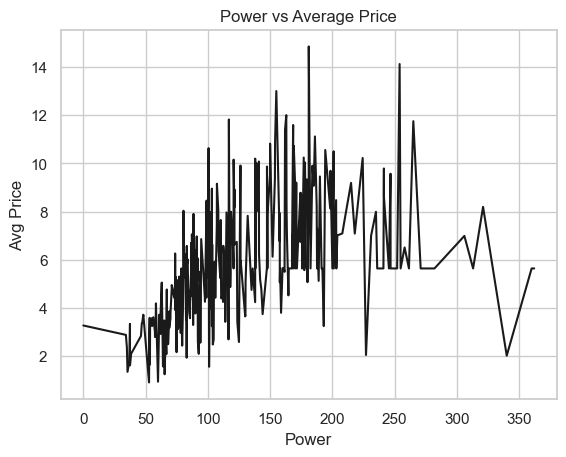

In [123]:
ax = sns.lineplot(x=Power_vs_price['Power'],y=Power_vs_price.Price,color='k')
plt.title("Power vs Average Price")
plt.xlabel("Power")
plt.ylabel("Avg Price")
plt.show()

In [124]:
Seats_vs_price = df_1.groupby('Seats')['Price'].mean().reset_index()
Seats_vs_price

,Seats,Price
0,2.0,4.320000
1,4.0,3.247812
2,5.0,5.310152
3,6.0,6.752121
4,7.0,7.888637
5,8.0,6.280238
6,9.0,4.425000
7,10.0,4.708000


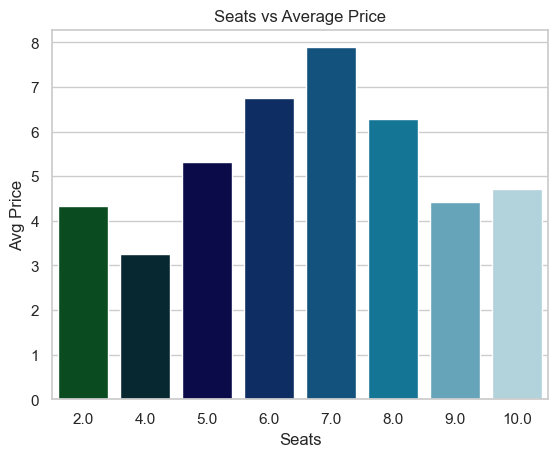

In [125]:
ax = sns.barplot(x=Seats_vs_price['Seats'],y=Seats_vs_price.Price,palette='ocean')
plt.title("Seats vs Average Price")
plt.xlabel("Seats")
plt.ylabel("Avg Price")
plt.show()

In [126]:
Age_vs_price = df_1.groupby('Car_Age')['Price'].mean().reset_index()
Age_vs_price

,Car_Age,Price
0,4,7.519359
1,5,7.401064
2,6,6.972964
3,7,6.439876
4,8,5.988886
5,9,5.586182
6,10,5.473516
7,11,5.205608
8,12,4.936408
9,13,4.289587


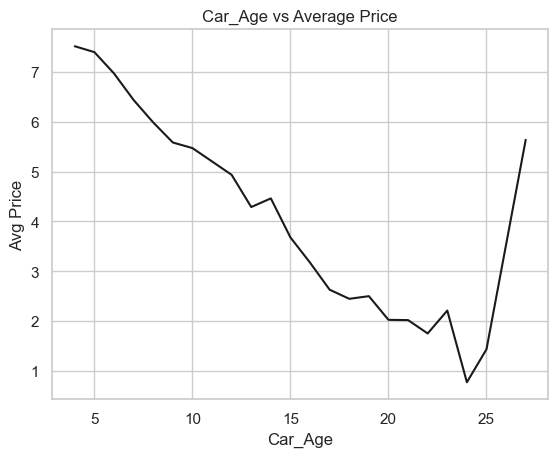

In [127]:
ax = sns.lineplot(x=Age_vs_price['Car_Age'],y=Age_vs_price.Price,color='k')
plt.title("Car_Age vs Average Price")
plt.xlabel("Car_Age")
plt.ylabel("Avg Price")
plt.show()

In [128]:
Brand_vs_price = df_1.groupby('Brand')['Price'].mean().sort_values(ascending=False).reset_index()
Brand_vs_price[:10]

,Brand,Price
0,Force,9.333333
1,BMW,9.252727
2,Mercedes-Benz,8.613165
3,Audi,8.535053
4,Land Rover,8.082222
5,Mitsubishi,7.622500
6,Volvo,7.592727
7,Jeep,7.512000
8,Mahindra,7.316744
9,Toyota,7.280294


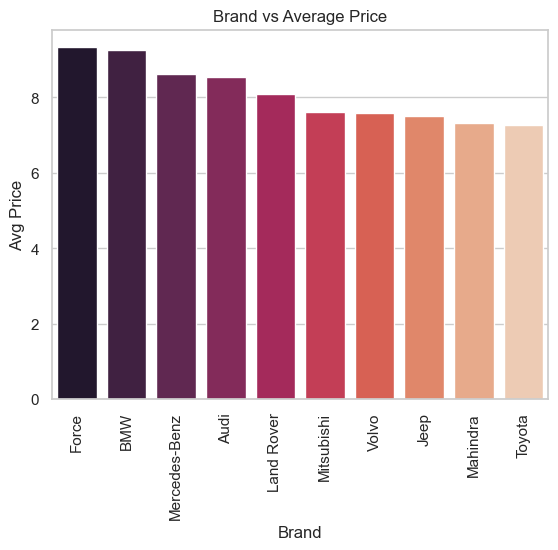

In [129]:
ax = sns.barplot(x=Brand_vs_price['Brand'].head(10),y=Brand_vs_price.Price.head(10),palette='rocket')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title("Brand vs Average Price")
plt.xlabel("Brand")
plt.ylabel("Avg Price")
plt.show()

In [130]:
Model_vs_price = df_1.groupby('Model')['Price'].mean().sort_values(ascending=False).reset_index()
Model_vs_price[:10]

,Model,Price
0,Q3 2.0,15.250000
1,Superb 2009-2014,14.450000
2,XC60 D5,13.800000
3,Hexa XTA,13.500000
4,Hexa XT,13.125000
5,XUV500 W7,13.000000
6,Prius 2009-2016,12.750000
7,Octavia Elegance,12.185000
8,X1 sDrive,12.166667
9,XUV500 W10,12.046154


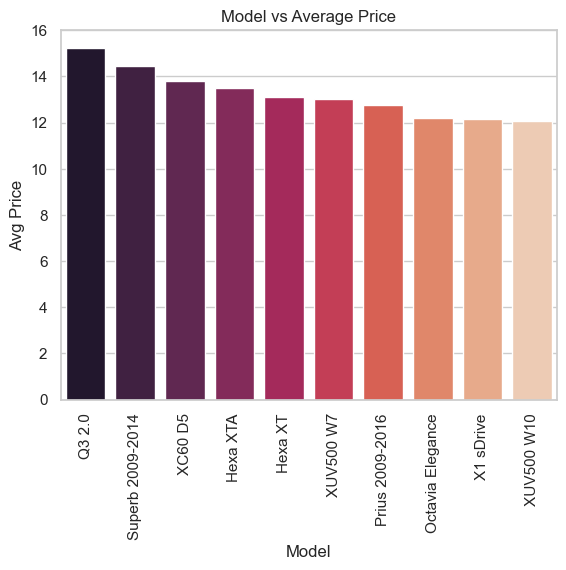

In [131]:
# plt.figure(figsize=(12,7))
ax =sns.barplot(x=Model_vs_price['Model'].head(10),y=Model_vs_price.Price.head(10),palette='rocket')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title("Model vs Average Price")
plt.xlabel("Model")
plt.ylabel("Avg Price")
plt.show()

### INSIGHTS BY Q & A

#### Q: Top Expensive Brands and Moodels alongwith Price list.

In [132]:
df.groupby(['Brand','Model'])['Price'].max().sort_values(ascending=False).reset_index().head()

,Brand,Model,Price
0,Land Rover,Rover Range,160.00
1,Lamborghini,Gallardo Coupe,120.00
2,Jaguar,F Type,100.00
3,BMW,7 Series,93.67
4,Mercedes-Benz,SLK-Class 55,90.00


# Thank You